# Predicting Obesity Levels Based on Lifestyle and Demographic Factors Using Machine Learning
## Phase 1: Data Preprocessing and Exploratory Data Analysis 

**Author:** Tanjeena Tahrin Islam  
**Year:** 2025  
**Project Type:** Machine Learning   
**Programming Language:** Python  
**Tech Stack:** Python, NumPy, Pandas, Matplotlib, Seaborn  
**Dataset:** Obesity Prediction Dataset (UCI Machine Learning Repository)

## Introduction <a id='itr'></a>
Obesity is a growing global health concern influenced by various lifestyle and behavioral factors. The project aims to explore and analyze the Obesity Prediction dataset to understand the relationship between individual habits and obesity levels. Phase 1 focuses on data cleaning, preprocessing, and exploratory analysis to uncover initial patterns and prepare the dataset for predictive modeling.

### Dataset Source
The Obesity Prediction dataset used in this study was sourced from the UCI Machine Learning Repository. It includes data for estimating obesity levels in individuals from Mexico, Peru, and Colombia, based on their eating habits, physical condition, and lifestyle factors (Adeniran, n.d.).

### Dataset Overview
The Obesity Prediction Dataset contains 2111 observations and 16 features (excluding obesity levels) that capture a wide range of lifestyle, behavioral, and physical factors associated with obesity. These features serve as independent variables used to predict obesity levels. These include attributes such as age, gender, physical activity frequency (FAF), daily water intake (CH2O), and frequency of vegetable consumption (FCVC). Other relevant features like snacking habits (CAEC) and alcohol consumption (CALC) help provide a comprehensive profile of individuals' health behaviors. These variables serve as predictors in modeling obesity levels and identifying patterns associated with weight status.

In [1]:
# Installations
!pip install --quiet tensorflow

In [2]:
#suppress warning messages
import warnings
warnings.filterwarnings("ignore")

#suppress warning messages
import warnings
warnings.filterwarnings("ignore")

# import packages
import numpy as np
import pandas as pd
import io
import requests
#display all columns
pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")

from IPython.display import display, HTML
from tabulate import tabulate

from sklearn.preprocessing import LabelEncoder

In [3]:
# dataset imported
df_name = 'ObesityDataSet_raw_and_data_sinthetic.csv'
obs_df = pd.read_csv(df_name)

In [4]:
# number of observations and features
num_observations = obs_df.shape[0]
num_features = obs_df.shape[1]
print(f'Number of observations (rows): {num_observations}')
print(f'Number of features (columns): {num_features}')

# printing random 10 rows of the dataset
print("\nRandom 10 rows of the obesity dataset:")
obs_df.sample(n=10)

Number of observations (rows): 2111
Number of features (columns): 17

Random 10 rows of the obesity dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
662,Female,20.552695,1.523426,42.000000,no,yes,3.000000,1.000000,Frequently,no,1.185062,no,0.000000,0.076654,Sometimes,Public_Transportation,Insufficient_Weight
946,Male,19.637203,1.814182,85.301029,yes,yes,2.923916,3.335876,Sometimes,no,2.372444,no,1.305633,0.311436,Sometimes,Public_Transportation,Overweight_Level_I
149,Female,32.000000,1.670000,90.000000,yes,yes,3.000000,1.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
33,Male,39.000000,1.790000,90.000000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
1589,Male,38.523646,1.765836,118.533246,yes,yes,2.177896,2.987652,Sometimes,no,1.745095,no,0.656548,0.000000,Sometimes,Automobile,Obesity_Type_II
640,Female,20.172661,1.605521,44.661461,no,no,3.000000,2.893778,Frequently,no,1.000000,yes,0.769726,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
2041,Female,25.470652,1.680218,104.807284,yes,yes,3.000000,3.000000,Sometimes,no,1.423073,no,0.197993,0.763359,Sometimes,Public_Transportation,Obesity_Type_III
1976,Female,26.000000,1.648143,111.950113,yes,yes,3.000000,3.000000,Sometimes,no,2.786417,no,0.000000,0.079673,Sometimes,Public_Transportation,Obesity_Type_III
487,Male,20.000000,1.840000,104.000000,yes,no,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,0.000000,no,Motorbike,Obesity_Type_I
395,Female,20.000000,1.540000,39.000000,yes,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight


### Dataset Features
The features in our dataset are described in the table below. These descriptions are taken from the source.

In [5]:
# dataset features
data_description = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['Gender', 'Nominal categorical', 'NA', 'Male or Female'],
    ['Age', 'Numeric', 'Years', 'The person’s age'],
    ['Height', 'Numeric', 'Meters', 'Height'],
    ['Weight', 'Numeric', 'Kilograms', 'Body weight'],
    ['family_history_with_overweight', 'Nominal categorical', 'NA', 'Family history of being overweight (yes/no)'],
    ['FAVC', 'Nominal categorical', 'NA', 'Frequent consumption of high-calorie foods (yes/no)'],
    ['FCVC', 'Ordinal categorical', 'Scale', 'Frequency of vegetable consumption (1 to 3)'],
    ['NCP', 'Numeric', 'NA', 'Number of main meals per day'],
    ['CAEC', 'Ordinal categorical', 'NA', 'Frequency of consuming food between meals (Never, Sometimes, Frequently, Always)'],
    ['SMOKE', 'Nominal categorical', 'NA', 'Whether the person smokes (yes/no)'],
    ['CH2O', 'Ordinal categorical', 'Scale', 'Daily water intake (1 to 3)'],
    ['SCC', 'Nominal categorical', 'NA', 'Monitors calorie intake (yes/no)'],
    ['FAF', 'Ordinal categorical', 'Scale', 'Physical activity frequency (0 to 3)'],
    ['TUE', 'Ordinal categorical', 'Scale', 'Time spent using technology (0 to 3)'],
    ['CALC', 'Ordinal categorical', 'NA', 'Frequency of alcohol consumption (Never, Sometimes, Frequently, Always)'],
    ['MTRANS', 'Nominal categorical', 'NA', 'Main mode of transportation'],
    ['NObeyesdad', 'Ordinal categorical', 'NA', 'Obesity level']
]
display(HTML('<b>Table 1: Features with description</b>'))
print(tabulate(data_description, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════╤═════════════════════╤═══════════╤══════════════════════════════════════════════════════════════════════════════════╕
│ Name                           │ Data Type           │ Units     │ Description                                                                      │
╞════════════════════════════════╪═════════════════════╪═══════════╪══════════════════════════════════════════════════════════════════════════════════╡
│ Gender                         │ Nominal categorical │ NA        │ Male or Female                                                                   │
├────────────────────────────────┼─────────────────────┼───────────┼──────────────────────────────────────────────────────────────────────────────────┤
│ Age                            │ Numeric             │ Years     │ The person’s age                                                                 │
├────────────────────────────────┼─────────────────────┼───────────┼────────────────────

### Target Feature
For this project, the target feature in this dataset will be the obesity level. This variable categorises individuals' obesity levels into 7 types which are Insufficient Weight, Normal Weight, Overweight Levels, and Obesity Types. This target variable will be predicted based on the demographic, health and lifestyle related explanatory/descriptive variables.

## Goals and Objectives
Addressing this expanding health issue requires an understanding of the lifestyle variables that contribute to obesity. We can gain advantages by modeling obesity levels based on demographic, lifestyle, and health features of a person. Healthcare providers can employ this model to deliver personalized health advice and interventions, thus enhancing patient results. Researchers might investigate the correlations between lifestyle choices and obesity to deepen our comprehension of this intricate topic. This model can be included into machine learning applications designed to enhance public health policies.

The main objectives of this project are two-fold: (1) predict an individual's obesity level based on a comprehensive set of lifestyle and demographic variables, and (2) identify which factors serve as the strongest predictors of obesity. A secondary objective involves performing exploratory data analysis, consisting of basic descriptive statistics and data visualisation plots, to uncover patterns and relationships within the dataset. This will follow initial data cleaning and preprocessing phases, ensuring the accuracy and integrity of the analysis.

We assume that each observation in the dataset is independent, meaning an individual’s lifestyle factors are evaluated separately from others. Although this simplification may not fully capture the complex interactions between people’s environments and behaviors, it enables the effective use of standard predictive models. This foundational approach supports future research and potential applications in the healthcare field.

## Data Cleaning and Preprocessing
In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps
* Check for irrelevant features
* Check feature data types, and labeling
* Check for missing values
* Check for outliers
* Check the labels of variables with scale
* Reforming scale variables to maintain the information
* Label encode target feature

Let's first display all the columns in our dataset.

In [6]:
obs_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Next, we check for data type. We have some categorical, some continuouos and some ordered scales in the dataset. They all match the intended data types, thus no change is needed here.

In [7]:
# Check for data types
print(f"Shape of the dataset = {obs_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(obs_df.dtypes)

Shape of the dataset = (2111, 17) 

Data types are below where 'object' indicates a string type: 
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


Next, we check for the labels of categorical variables. From the below result, we can see that all the labeling are correct and no need of change in there.

In [8]:
categorical_columns = obs_df.select_dtypes(include=['object', 'category']).columns
# check for unique labeling
for col in categorical_columns:
    print(f"{col}: {obs_df[col].unique()}")

Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Since BMI is calculated from height and weight, these features should have been dropped from the dataset to avoid redundancy.

In [9]:
# dropping redundant variables 
obs_df = obs_df.drop(['Height', 'Weight'], axis=1)

The 'MTRANS' (main mode of transportation) variable was converted into a binary variable 'MTRANS_Walk' indicating whether walking is the main mode of transportation or not, as this appeared to be more influential to obesity levels.

In [10]:
# creating a new variable MTRANS_Walk from MTRANS
obs_df['MTRANS'] = obs_df['MTRANS'].apply(lambda x: 'yes' if str(x).lower() == 'walking' else 'no')
obs_df.rename(columns={'MTRANS': 'MTRANS_Walk'}, inplace=True)

Next, missing values are checked by displaying the number of missing values in every column. We observe no features have missing values. Therefore, no step is needed. 

In [11]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(obs_df.isnull().sum())


Number of missing values for each column/ feature:
Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS_Walk                       0
NObeyesdad                        0
dtype: int64


Next, the summary statistics are generated for all the numerical features. There does not seem to be any outliers in the data.

In [12]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
obs_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.0,19.947192,22.777890,26.000000,61.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.000000,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.000000,4.0
CH2O,2111.0,2.008011,0.612953,1.0,1.584812,2.000000,2.477420,3.0
FAF,2111.0,1.010298,0.850592,0.0,0.124505,1.000000,1.666678,3.0
TUE,2111.0,0.657866,0.608927,0.0,0.000000,0.625350,1.000000,2.0


The variables FCVC, NCP, CH2O, FAF, and TUE are expected to be scale variables in the form of integers. Upon examination, we found that these variables did not conform to this expected format, as they contained decimal values. To rectify this, we applied a data cleaning process which involved rounding each value to the nearest integer, thereby ensuring alignment with the intended scale.

In [13]:
def is_scale(df, column):
    # Check if all values are integers
    return df[column].apply(lambda x: x % 1 == 0).all()

# Variables to check
variables = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Checking each variable and printing results
for var in variables:
    if is_scale(obs_df, var):
        print(f"{var} is a scale (all values are integers).")
    else:
        print(f"{var} is not a scale (contains decimal values).")
print("These variables need cleaning")
# Function to clean and convert variables to integers
def clean_scale(df, column):
    # Round the values to the nearest integer
    df[column] = df[column].round().astype(int)

# Variables to clean
variables_clean = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Cleaning each variable
for var in variables_clean:
    clean_scale(obs_df, var)
print("Variables are cleaned")

# rechecking after cleaning each variable and printing results
for var in variables:
    if is_scale(obs_df, var):
        print(f"{var} is a scale (all values are integers).")
    else:
        print(f"{var} is not a scale (contains decimal values).")

FCVC is not a scale (contains decimal values).
NCP is not a scale (contains decimal values).
CH2O is not a scale (contains decimal values).
FAF is not a scale (contains decimal values).
TUE is not a scale (contains decimal values).
These variables need cleaning
Variables are cleaned
FCVC is a scale (all values are integers).
NCP is a scale (all values are integers).
CH2O is a scale (all values are integers).
FAF is a scale (all values are integers).
TUE is a scale (all values are integers).


Finally, label encoding of categorical variables with string value was performed because predictive models require numerical inputs.

In [14]:
copy_df = obs_df.copy()

# binary variables: label encoding
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS_Walk']
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    copy_df[col] = le.fit_transform(copy_df[col])
    label_encoders[col] = le

# ordinal variables: ordinal encoding
ordinal_labels = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
copy_df['CAEC'] = copy_df['CAEC'].map(ordinal_labels)
copy_df['CALC'] = copy_df['CALC'].map(ordinal_labels)

# target variable NObeyesdad label encoding
target_label = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}   
copy_df['NObeyesdad'] = copy_df['NObeyesdad'].map(target_label)

In [15]:
print("Binary label mappings:")
for col, le in label_encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Binary label mappings:
Gender: {'Female': 0, 'Male': 1}
family_history_with_overweight: {'no': 0, 'yes': 1}
FAVC: {'no': 0, 'yes': 1}
SMOKE: {'no': 0, 'yes': 1}
SCC: {'no': 0, 'yes': 1}
MTRANS_Walk: {'no': 0, 'yes': 1}


In [16]:
# saving preprocessed data file
copy_df.to_csv('phase1_preprocessed.csv', index=False)

## Data Exploration and Visualisation

The dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Frequency Distribution of Target Variable

In [17]:
# frequency distribution of target variable
counts = obs_df['NObeyesdad'].value_counts()
percentages = obs_df['NObeyesdad'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)}))

                     Count  Percentage (%)
NObeyesdad                                
Obesity_Type_I         351           16.63
Obesity_Type_III       324           15.35
Obesity_Type_II        297           14.07
Overweight_Level_I     290           13.74
Overweight_Level_II    290           13.74
Normal_Weight          287           13.60
Insufficient_Weight    272           12.88


### Univariate Visualisation

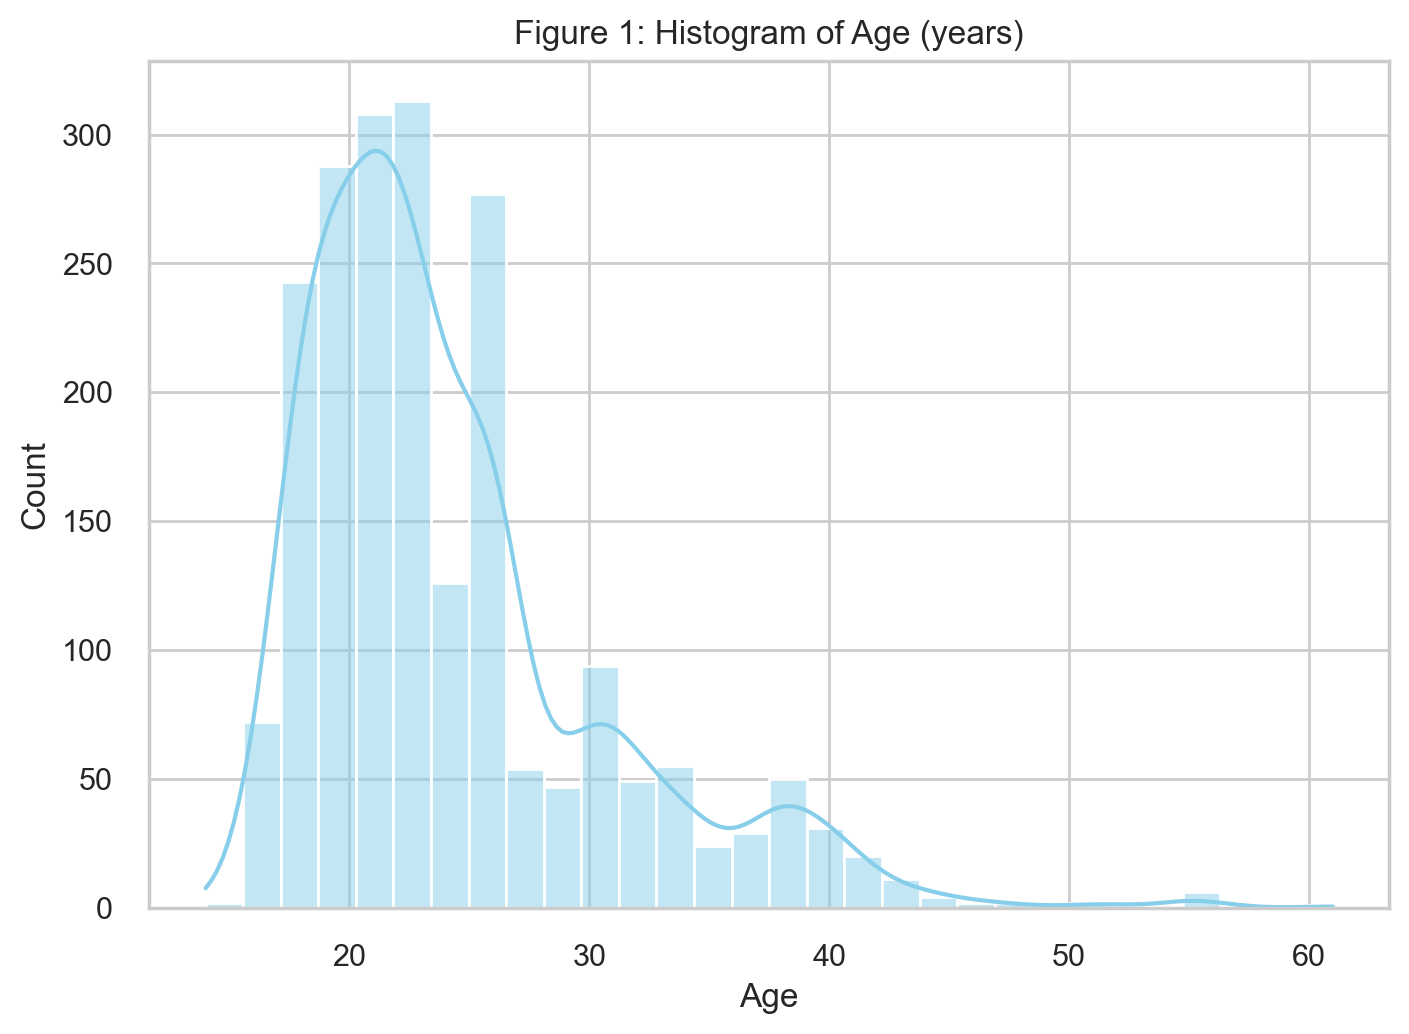

In [18]:
sns.set(style="whitegrid")

sns.histplot(copy_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Figure 1: Histogram of Age (years)')
plt.show()

The distributions of age in the dataset are right-skewed, indicating that most individuals are relatively young, around 20 years old, with a smaller number of older participants reaching up to 60 years.

#### Bar Chart of Method
Figures 2, 3, and 4 present the distribution of key dietary habits among individuals in the dataset. 

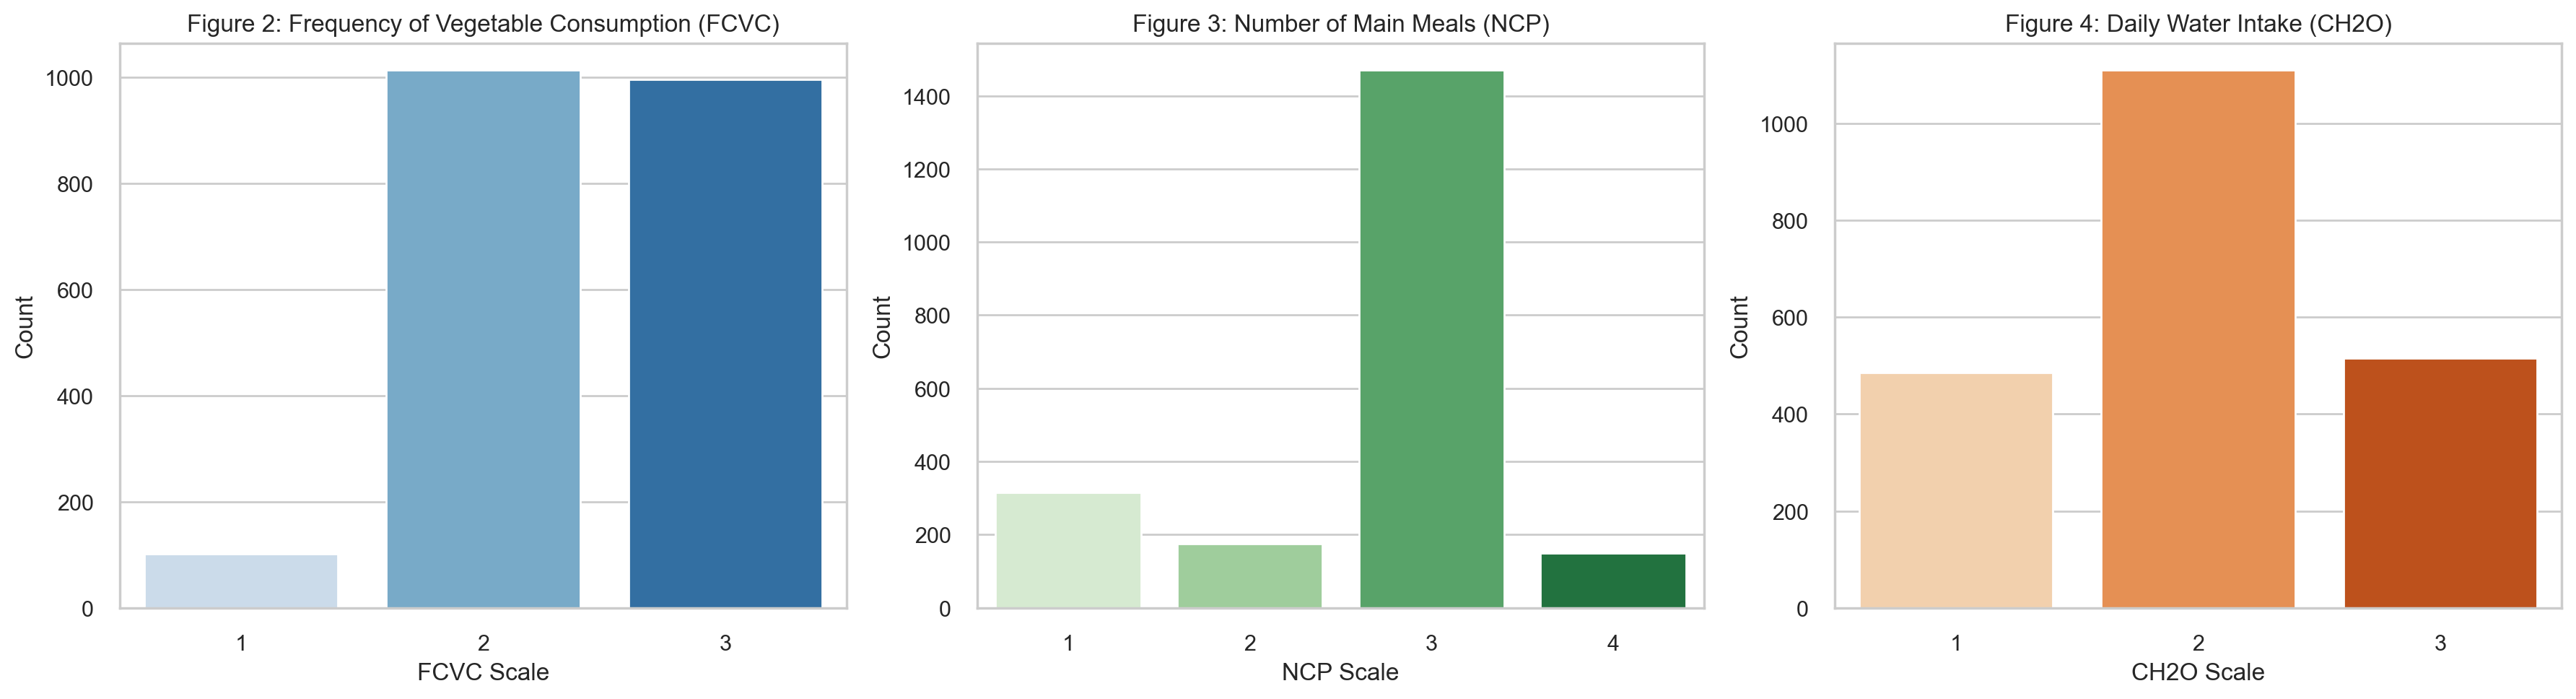

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# FCVC
sns.countplot(x='FCVC', data=copy_df, ax=axes[0], palette="Blues")
axes[0].set_title("Figure 2: Frequency of Vegetable Consumption (FCVC)")
axes[0].set_xlabel("FCVC Scale")
axes[0].set_ylabel("Count")

# NCP
sns.countplot(x='NCP', data=copy_df, ax=axes[1], palette="Greens")
axes[1].set_title("Figure 3: Number of Main Meals (NCP)")
axes[1].set_xlabel("NCP Scale")
axes[1].set_ylabel("Count")

# CH2O
sns.countplot(x='CH2O', data=copy_df, ax=axes[2], palette="Oranges")
axes[2].set_title("Figure 4: Daily Water Intake (CH2O)")
axes[2].set_xlabel("CH2O Scale")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

Figure 2 illustrates the frequency of vegetable consumption, showing that participants most often included vegetables in their meals. Figure 3 displays the number of main meals consumed per day, indicating that the majority of individuals reported having three meals daily. Figure 4 represents daily water intake levels, highlighting that most participants maintained a moderate level of hydration. Together, these plots provide valuable insights into common lifestyle habits that may influence health outcomes such as obesity.

### Two-Variable Visualisation
#### Bivariate Barplots of Obesity and Lifestyle-Related Variables
Figures 5, 6 and 7 illustrate the bivariate relationships between obesity level and various lifestyle-related variables.

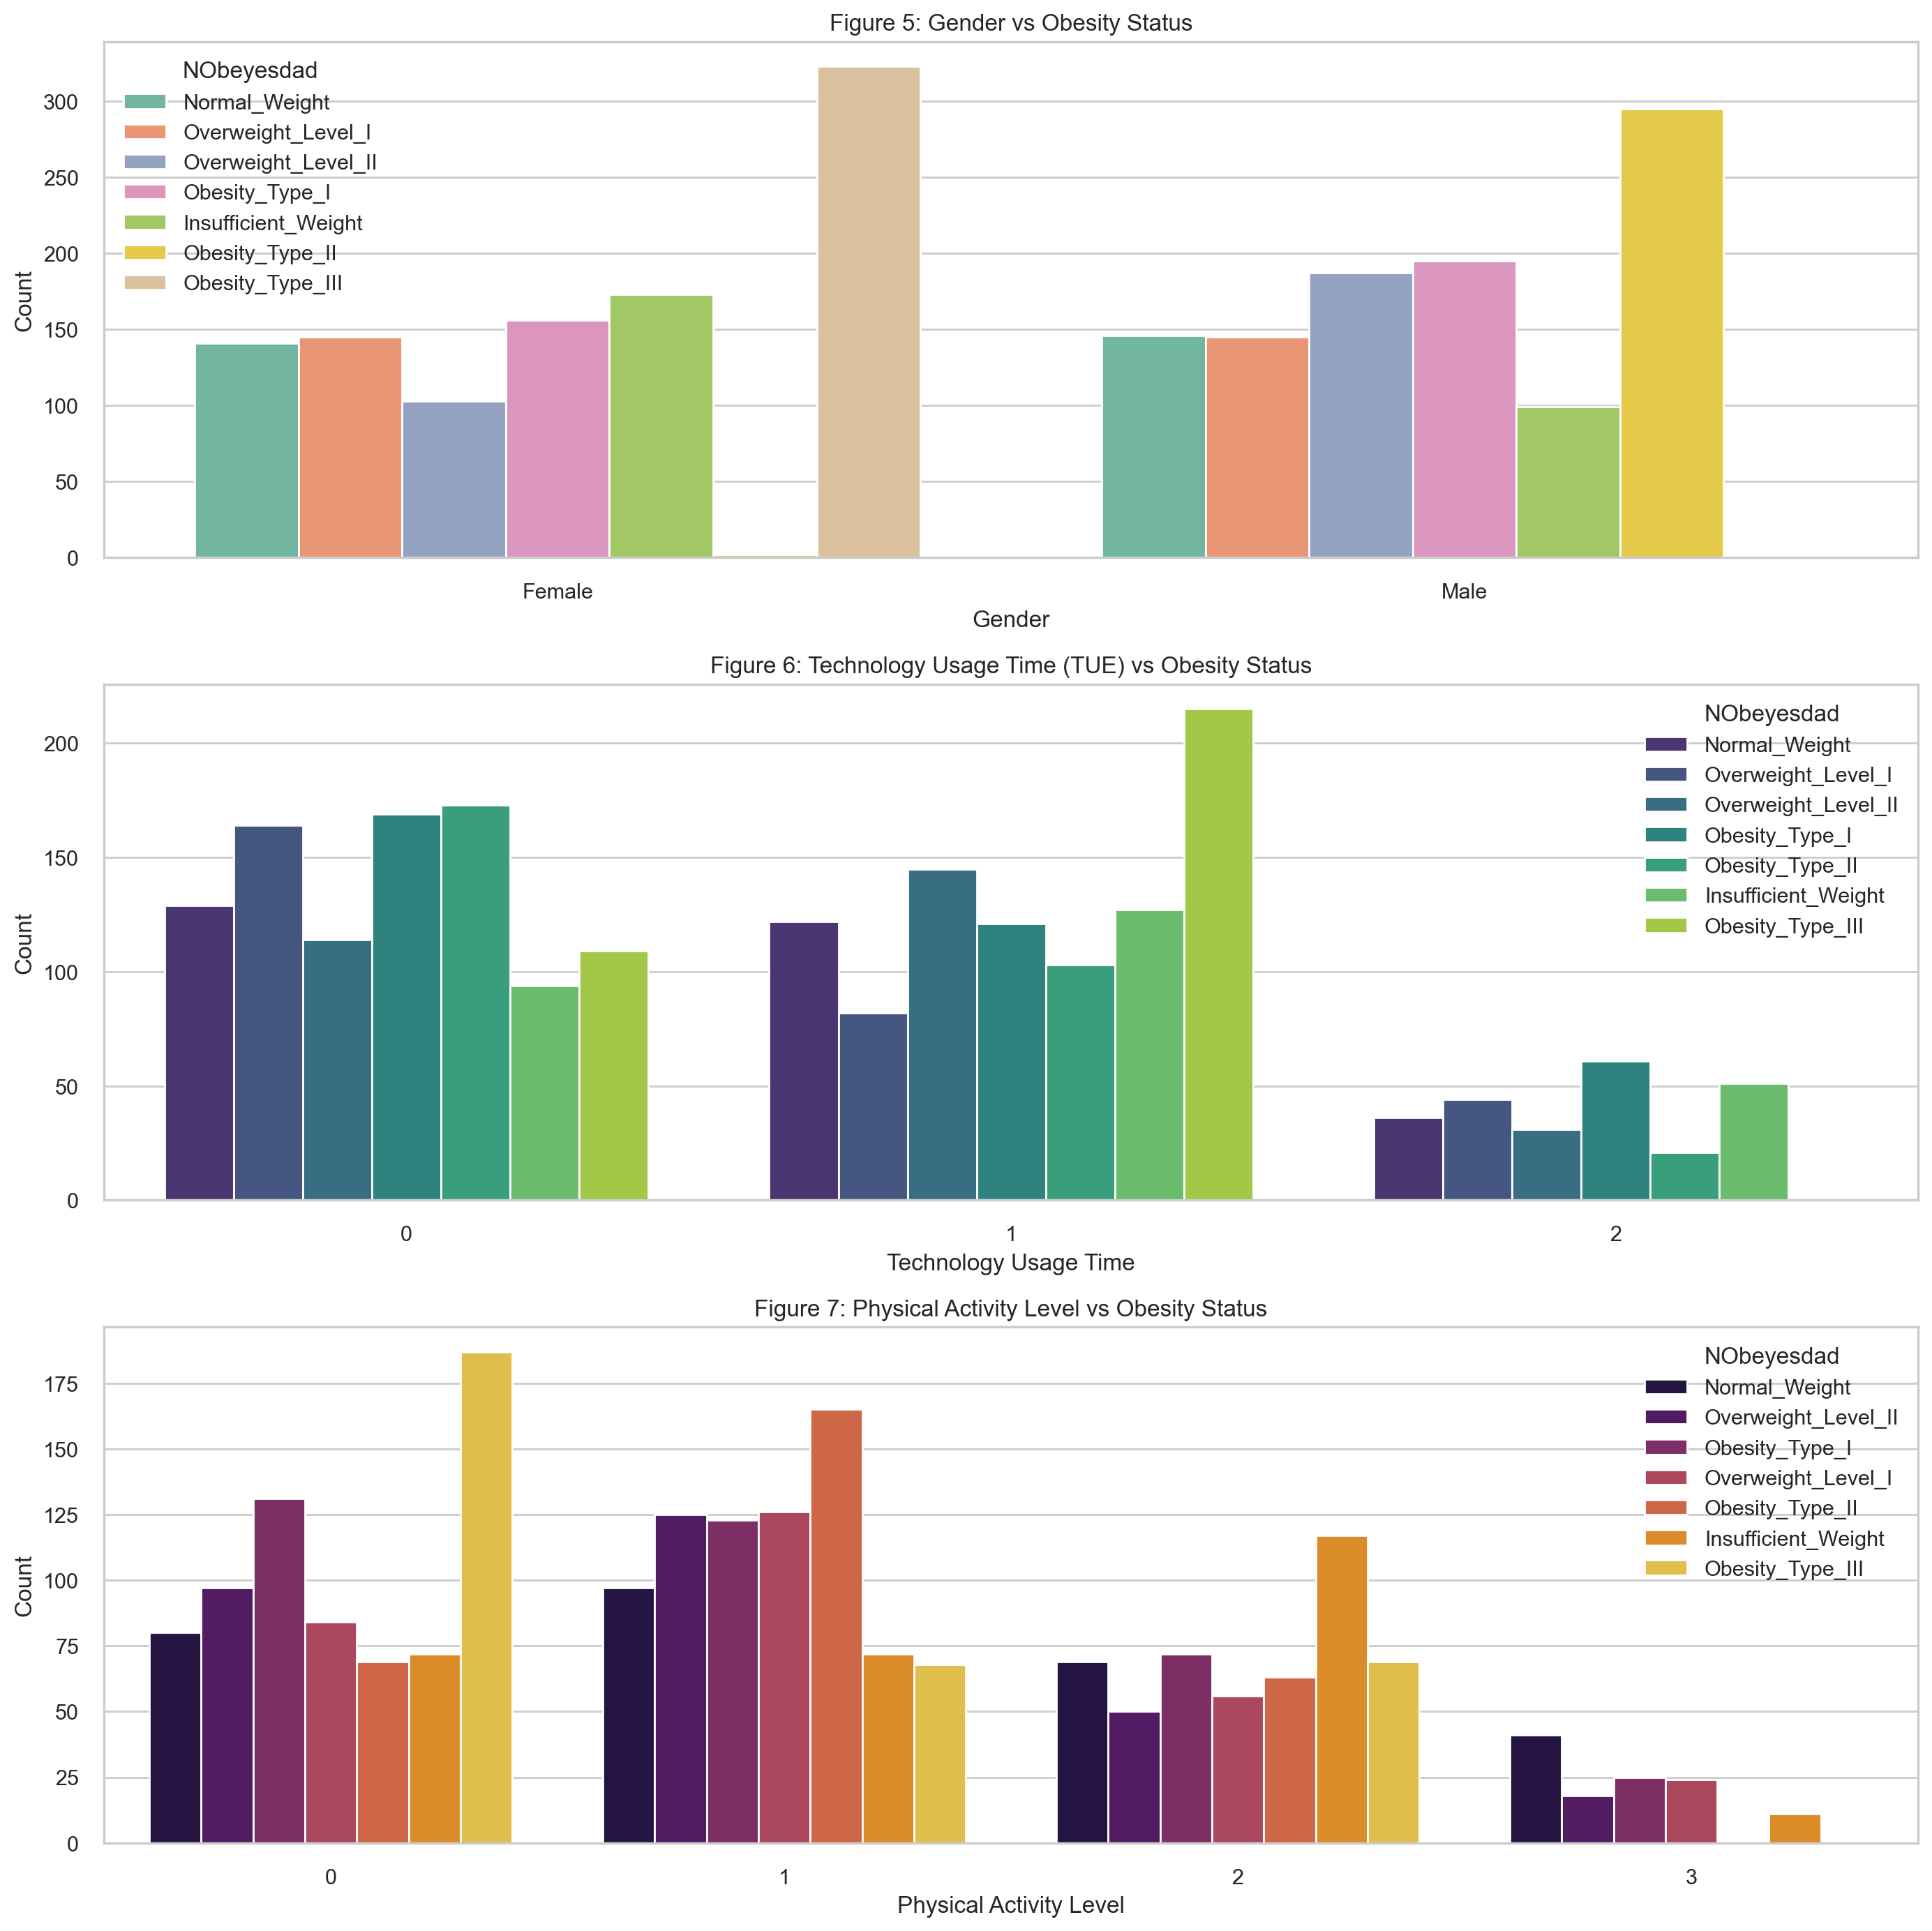

In [20]:
# Set the figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

# Plot 1: Gender vs Obesity Status
sns.countplot(x='Gender', hue='NObeyesdad', data=obs_df, palette='Set2', ax=axes[0])
axes[0].set_title('Figure 5: Gender vs Obesity Status')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot 2: technology used vs Obesity Status
sns.countplot(x='TUE', hue='NObeyesdad', data=obs_df, palette='viridis', ax=axes[1])
axes[1].set_title('Figure 6: Technology Usage Time (TUE) vs Obesity Status')
axes[1].set_xlabel('Technology Usage Time')
axes[1].set_ylabel('Count')

# Plot 3: Physical activity level vs Obesity Status
sns.countplot(x='FAF', hue='NObeyesdad', data=obs_df, palette='inferno', ax=axes[2])
axes[2].set_title('Figure 7: Physical Activity Level vs Obesity Status')
axes[2].set_xlabel('Physical Activity Level')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Figure 5 shows that obesity is present across both genders; however, males tend to have higher counts in the more severe obesity categories (Obesity Types II and III), while females appear more frequently in lower weight categories such as Insufficient Weight and Overweight Level I. Normal weight distribution is relatively similar between genders.

Figure 6 indicates a relationship between technology usage time and obesity status. Higher obesity levels are more common among individuals with moderate to high technology usage, suggesting that increased sedentary behavior may be associated with greater obesity severity.

Figure 7 presents the inverse relationship between physical activity and obesity level. People with lowest physical activity have the highest obesity type among them, whereas majority of people with highest physical level have normal weight. 

## Summary and Conclusions
Phase 1 of this study concentrated on data preprocessing and exploration of the Obesity Prediction dataset obtained from the UCI Machine Learning Repository. The dataset contains 2,111 entries with 16 attributes relevant to lifestyle and health. Principal explanatory variables are age, gender, physical activity levels, vegetable and water consumption, snacking behaviors, and alcohol intake—elements recognized to affect obesity outcomes.

We performed extensive data cleaning and preprocessing, which involved managing data types, removing redundent variables, identifying and handling missing values and outliers, and encoding category variables. This change improves model interpretability and coincides with healthcare goals centered on early detection and prevention.

Exploratory data analysis provided preliminary insights into lifestyle trends and their possible associations with obesity. Univariate visualizations indicated that age distribution was right-skewed. Bivariate analysis revealed significant trends, including a higher frequency of obesity among older adults and variable levels of lifestyle participation among those with familial obesity histories. Patterns concerning gender, technology utilization, and physical activity were examined to comprehend behavioral and environmental influences.

This phase established the foundation for predictive modeling and advanced statistical analysis in the later phase. The insights obtained from data exploration emphasize the complex nature of obesity and reinforce the necessity of addressing lifestyle behaviors in both research and intervention design.

## References
- Adeniran, S. (n.d.). Obesity Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset